In [10]:
## Importer les packages nécessaires
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform

In [11]:
### Générer aléatoirement des données simulées de deux dimension
centres=4
X_train,true_lab=make_blobs(100,centers=centres,random_state=42)

In [12]:
print(X_train)

[[ -9.68512147   5.80867569]
 [ -6.06610997  -8.11097391]
 [ -2.97867201   9.55684617]
 [ -5.47683288  -8.28196066]
 [ -8.4805404    7.88430744]
 [ -7.87016352  -7.44640732]
 [  4.97114227   2.94871481]
 [  4.42020695   2.33028226]
 [  4.73695639   2.94181467]
 [ -3.6601912    9.38998415]
 [ -3.05358035   9.12520872]
 [ -6.65216726  -5.57296684]
 [ -6.35768563  -6.58312492]
 [  3.53354386   0.77696306]
 [ -1.77073104   9.18565441]
 [ -9.90922025   7.80599533]
 [ -8.56163696   8.15070616]
 [  4.56786871   2.97670258]
 [ -9.72218519   7.47724802]
 [ -8.36509013   7.250694  ]
 [ -2.97261532   8.54855637]
 [ -8.91542947   7.66467489]
 [ -9.28484271   8.17992171]
 [  5.00127444   3.51120625]
 [  4.6040528    3.53781334]
 [ -2.96983639  10.07140835]
 [  3.22450809   1.55252436]
 [ -8.21266041   6.46636536]
 [ -9.81300943   8.11060752]
 [ -8.1165779   -8.20056621]
 [ -7.55965191  -6.6478559 ]
 [  4.93599911   2.23422496]
 [ -7.07198816  -6.57856225]
 [ -7.67973218   6.5028406 ]
 [ -0.92998481

<Axes: >

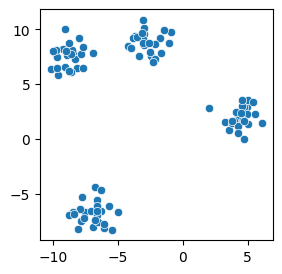

In [14]:
### Illustration graphique
plt.figure(figsize=[3,3])
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                #hue=true_lab,
                #style=true_lab,
                # palette="deep", # Removed the ignored palette argument
                legend=None
                )

In [5]:
### Definir la distance euclidienne
def euclid(centre,data):
    return np.sqrt(np.sum((centre-data)**2,axis=1))

In [15]:
### Créer Kmeans from scratch
class Kmeans:
    ##Définir le constructeur
    def __init__(self,n_cl=20,Iter_max=100):
        self.n_cl=n_cl
        self.Iter_max=Iter_max
    ###
    def fit(self,X_train):
        ## Initialisation aléatoire des centres
        min_,max_=np.min(X_train,axis=0),np.max(X_train,axis=0)
        self.centres=[uniform(min_,max_) for _ in range(self.n_cl)]
        ##
        itr=0
        prec_centres=None
        while np.not_equal(self.centres,prec_centres).any() and itr<=self.Iter_max:
            ### Affecter chaque point au groupe de centre gagnant
            grp_points=[[] for _ in range(self.n_cl)]
            for x in X_train:
                dists=euclid(self.centres,x)
                idx=np.argmin(dists)
                #print(idx)
                grp_points[idx].append(x)
            prec_centres=self.centres
            # Calculer les nouveaux centres
            self.centres=[np.mean(groupe,axis=0) for groupe in grp_points]
            ## enumerate retourne l'indice et la valeur de l'indice
            ##Remplacement des centres non définis par les centres précédents pour éviter les valeurs NaN
            for i,centre in enumerate(self.centres):
                if np.isnan(centre).any():
                    self.centres[i]=prec_centres[i]
            
            itr+=1
        #return points_aff
    def evaluation(self,X):
        centres = []
        idxs = []
        for x in X:
            dists = euclid(x, self.centres)
            idx = np.argmin(dists)
            centres.append(self.centres[idx])
            idxs.append(idx)
        return centres, idxs


In [16]:
### Créer et entrainer le modèle Kmeans
km=Kmeans(n_cl=4)
centres=km.fit(X_train)
#print(len(centres[0]))

In [20]:
###
class_centers, classification = km.evaluation(X_train)
print(len(class_centers))
#print(class_centers)
print([x for x, _ in km.centres])
print([y for _, y in km.centres])
print(classification)

100
[np.float64(-6.9749469009335145), np.float64(4.444417646748971), np.float64(-8.854612195776115), np.float64(-2.698272507037713)]
[np.float64(-6.764719664988015), np.float64(2.0212214813741207), np.float64(7.548082423511621), np.float64(8.743419509848977)]
[np.int64(2), np.int64(0), np.int64(3), np.int64(0), np.int64(2), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(0), np.int64(0), np.int64(1), np.int64(3), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(3), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(3), np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(2), np.int64(2), np.int64(3)

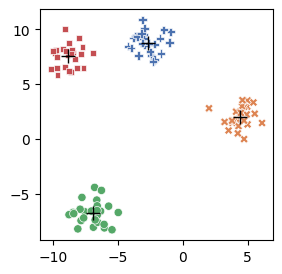

In [21]:
plt.figure(figsize=[3,3])
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_lab,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in km.centres],
         [y for _, y in km.centres],
         'k+',
         markersize=10,
         )
plt.show()

In [23]:
def inertia_intra(X, labels, centres):
    """
    Inertie intra-classes (Within-Cluster Sum of Squares, WCSS) :
    somme des distances au carré de chaque point à son centroïde.
    """
    X = np.asarray(X)
    centres = np.asarray(centres)
    s = 0.0
    for k in range(len(centres)):
        members = X[labels == k]
        if members.size == 0:
            continue
        diffs = members - centres[k]
        s += float(np.sum(diffs * diffs))
    return s

def inertia_inter(X, labels, centres):
    """
    Inertie inter-classes (Between-Cluster Sum of Squares, BCSS) :
    somme sur k de n_k * ||mu_k - mu||^2, où mu est la moyenne globale.
    """
    X = np.asarray(X)
    centres = np.asarray(centres)
    if len(X) == 0:
        return 0.0
    mu = np.mean(X, axis=0)
    total = 0.0
    for k, c in enumerate(centres):
        n_k = int(np.sum(labels == k))
        if n_k == 0:
            continue
        diff = c - mu
        total += n_k * float(np.dot(diff, diff))
    return total

In [25]:
class Kmeans:
    def __init__(self, n_cl=4, Iter_max=100, tol=1e-6, random_state=None):
        self.n_cl = n_cl
        self.Iter_max = Iter_max
        self.tol = tol
        self.random_state = random_state
        self.centres = None

    def fit(self, X):
        X = np.asarray(X, dtype=float)

        # --- initialisation des centres (exemple simple au hasard) ---
        rng = np.random.default_rng(self.random_state)
        idx0 = rng.choice(len(X), size=self.n_cl, replace=False)
        self.centres = X[idx0].copy()

        history = []  # optionnel: garder l'historique des mesures

        for t in range(1, self.Iter_max + 1):
            # 1) affectation
            # distances au carré vers chaque centre
            d2 = np.sum((X[:, None, :] - self.centres[None, :, :])**2, axis=2)  # (n_samples, n_cl)
            labels = np.argmin(d2, axis=1)

            # 2) mise à jour des centres
            new_centres = self.centres.copy()
            for k in range(self.n_cl):
                members = X[labels == k]
                if len(members) > 0:
                    new_centres[k] = np.mean(members, axis=0)
                else:
                    # cluster vide -> réinitialiser au hasard
                    ridx = rng.integers(0, len(X))
                    new_centres[k] = X[ridx]

            # --- MESURES A CHAQUE ITERATION ---
            intra = inertia_intra(X, labels, new_centres)   # NEW
            inter = inertia_inter(X, labels, new_centres)   # NEW
            print(f"Iteration {t:02d} — Intra: {intra:.4f} | Inter: {inter:.4f}")  # NEW
            history.append((t, intra, inter))               # NEW (optionnel)

            # 3) critère d'arrêt (convergence des centres)
            shift = float(np.sqrt(np.sum((new_centres - self.centres)**2)))
            self.centres = new_centres
            if shift < self.tol:
                # print(f"Convergence atteinte (déplacement des centres = {shift:.2e})")
                break

        # retourner centres + labels + historique si besoin
        return self.centres, labels, history


In [27]:
# ---------- 1) Fonctions d'inertie ----------
def inertia_intra(X, labels, centres):
    """
    Inertie intra-classes (WCSS) : somme des distances^2
    de chaque point à son centroïde.
    """
    X = np.asarray(X)
    centres = np.asarray(centres)
    s = 0.0
    for k in range(len(centres)):
        members = X[labels == k]
        if members.size == 0:
            continue
        diffs = members - centres[k]
        s += float(np.sum(diffs * diffs))
    return s

def inertia_inter(X, labels, centres):
    """
    Inertie inter-classes (BCSS) : somme sur k de n_k * ||mu_k - mu||^2
    où mu est la moyenne globale.
    """
    X = np.asarray(X)
    centres = np.asarray(centres)
    if len(X) == 0:
        return 0.0
    mu = np.mean(X, axis=0)
    total = 0.0
    for k, c in enumerate(centres):
        n_k = int(np.sum(labels == k))
        if n_k == 0:
            continue
        diff = c - mu
        total += n_k * float(np.dot(diff, diff))
    return total


# ---------- 2) Kmeans avec affichage par itération ----------
class Kmeans:
    def __init__(self, n_cl=4, Iter_max=100, tol=1e-6, random_state=None, verbose=True):
        self.n_cl = n_cl
        self.Iter_max = Iter_max
        self.tol = tol
        self.random_state = random_state
        self.verbose = verbose
        self.centres = None
        self.history_ = []   # (iter, intra, inter)

    def fit(self, X):
        X = np.asarray(X, dtype=float)

        # Initialisation des centres (aléatoire sans remplacement)
        rng = np.random.default_rng(self.random_state)
        init_idx = rng.choice(len(X), size=self.n_cl, replace=False)
        self.centres = X[init_idx].copy()

        for t in range(1, self.Iter_max + 1):
            # Etape d'affectation
            # distances^2 vers chaque centre -> labels
            d2 = np.sum((X[:, None, :] - self.centres[None, :, :]) ** 2, axis=2)  # (n, k)
            labels = np.argmin(d2, axis=1)

            # Etape de mise à jour
            new_centres = self.centres.copy()
            for k in range(self.n_cl):
                members = X[labels == k]
                if len(members) > 0:
                    new_centres[k] = np.mean(members, axis=0)
                else:
                    # cluster vide -> réinit sur un point au hasard
                    new_centres[k] = X[rng.integers(0, len(X))]

            # ---- Affichage des mesures à CHAQUE itération ----
            intra = inertia_intra(X, labels, new_centres)
            inter = inertia_inter(X, labels, new_centres)
            self.history_.append((t, intra, inter))
            if self.verbose:
                print(f"Iteration {t:02d} — Intra: {intra:.4f} | Inter: {inter:.4f}")

            # Critère d'arrêt (convergence des centres)
            shift = float(np.sqrt(np.sum((new_centres - self.centres) ** 2)))
            self.centres = new_centres
            if shift < self.tol:
                if self.verbose:
                    print(f"Convergence atteinte (déplacement des centres = {shift:.2e}).")
                break

        return self.centres, labels, self.history_


# ---------- 3) Exemple minimal d'exécution ----------
# Utilise X_train si tu l'as déjà créé plus haut ; sinon, crée un petit jeu 2D.
try:
    X_data = X_train
except NameError:
    from sklearn.datasets import make_blobs
    X_data, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.2, n_features=2, random_state=42)

km = Kmeans(n_cl=4, Iter_max=100, tol=1e-6, random_state=7, verbose=True)
centres, labels, hist = km.fit(X_data)   # <<< C'EST CETTE LIGNE QUI DOIT ETRE EXECUTEE


Iteration 01 — Intra: 698.0233 | Inter: 5832.3800
Iteration 02 — Intra: 649.9187 | Inter: 5880.4847
Iteration 03 — Intra: 647.2033 | Inter: 5883.2001
Iteration 04 — Intra: 646.3738 | Inter: 5884.0296
Iteration 05 — Intra: 646.3738 | Inter: 5884.0296
Convergence atteinte (déplacement des centres = 0.00e+00).
